In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

In [202]:
pip install --upgrade scikit-learn

In [203]:
from google.colab import files
uploaded = files.upload()

Saving Churn.xlsx to Churn (3).xlsx


In [204]:
missing_values=['N/A',np.nan,'Nan']

In [205]:
#df = pd.read_excel("C:\\Users\\Sachi\\Downloads\\Churn.xlsx",na_values=missing_values)
df = pd.read_excel("Churn.xlsx",na_values=missing_values)

In [206]:
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


# Data Preprocessing

In [207]:
df.columns.tolist()

['Unnamed: 0',
 'state',
 'area.code',
 'account.length',
 'voice.plan',
 'voice.messages',
 'intl.plan',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls',
 'churn']

In [208]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [209]:
df.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [211]:
df.describe().style.background_gradient(cmap='Accent_r')

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.258600,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.694560,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.000000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.000000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


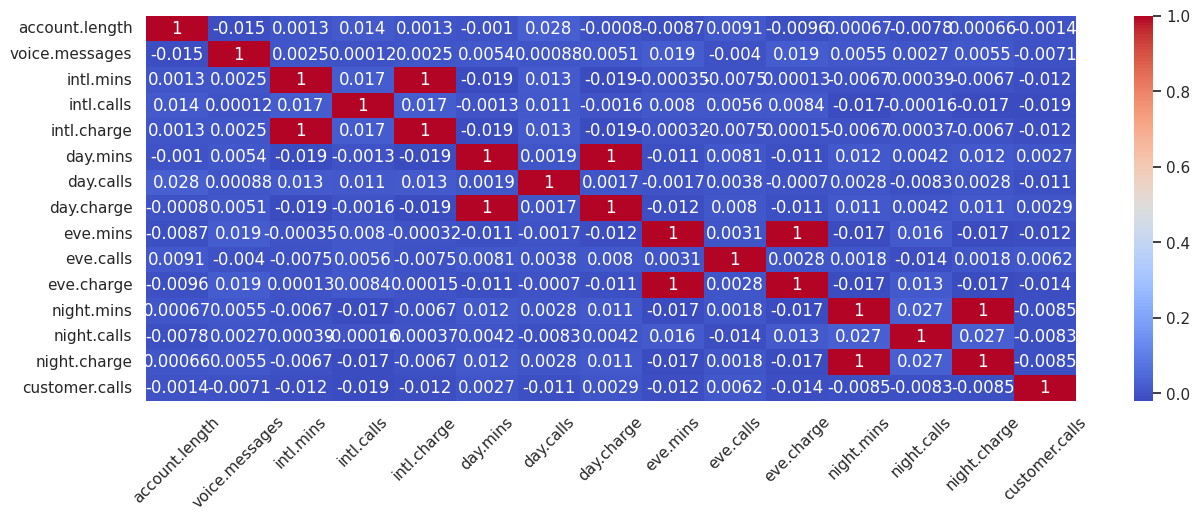

In [212]:
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()

# Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=45);

In [213]:
df.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [214]:
# Handling the missing values
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
df['day.charge']=imputer.fit_transform(df['day.charge'].values.reshape(-1,1))
df['eve.mins']=imputer.fit_transform(df['eve.mins'].values.reshape(-1,1))

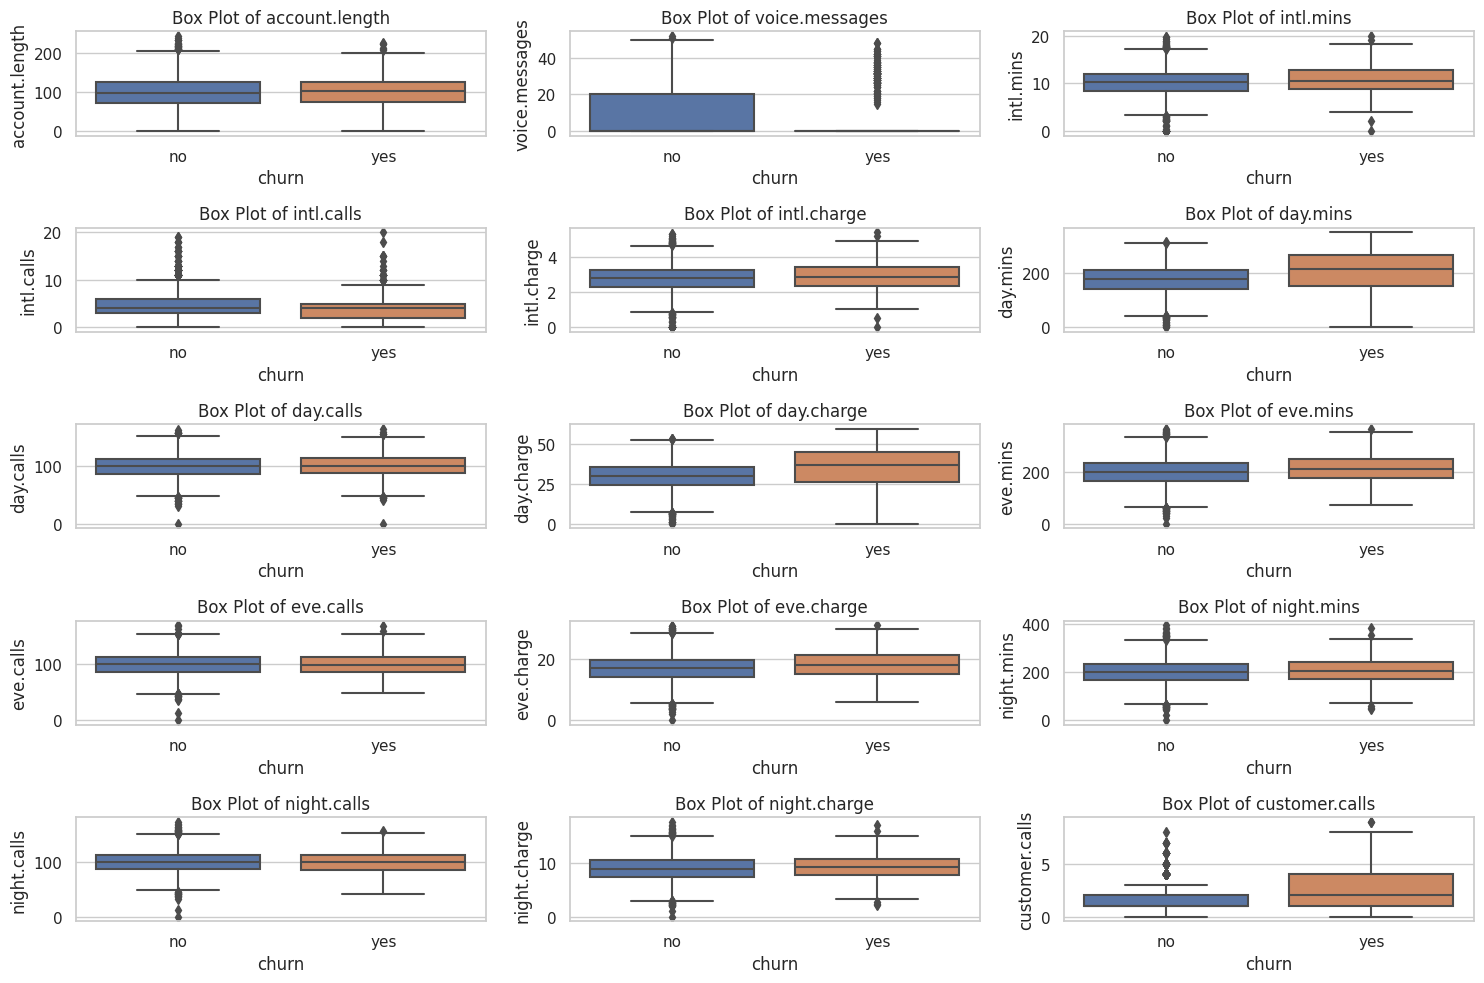

In [215]:
numerical_columns = ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge',
                     'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
                     'night.mins', 'night.calls', 'night.charge', 'customer.calls']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='churn', y=column, data=df)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [216]:
# Outliers
z_scores = stats.zscore(df[numerical_columns])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
print("\033[1;31mRows with outliers:\033[0m")
df.loc[outliers]

Rows with outliers:


,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
22,AZ,area_code_415,130,no,0,no,9.5,19,2.57,183.0,112,31.11,72.9,99,6.20,181.8,78,8.18,0,no
32,LA,area_code_408,172,no,0,no,12.6,10,3.40,212.0,121,36.04,31.2,115,2.65,293.3,78,13.20,3,no
41,MD,area_code_408,135,yes,41,yes,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,yes
58,WI,area_code_415,68,no,0,no,12.1,3,3.27,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,3,no
115,ME,area_code_510,36,yes,42,yes,20.0,6,5.40,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,VA,area_code_408,149,yes,28,no,0.0,0,0.00,212.8,117,36.18,159.9,86,13.59,222.7,88,10.02,1,no
4949,MO,area_code_415,154,no,0,no,1.1,5,0.30,162.0,87,27.54,199.5,147,16.96,243.0,66,10.93,1,no
4976,KY,area_code_408,145,no,0,no,19.7,4,5.32,135.0,122,22.95,206.3,88,17.54,210.4,90,9.47,0,no
4981,NC,area_code_510,61,no,0,no,12.0,4,3.24,7.2,97,1.22,221.8,78,18.85,174.5,94,7.85,1,no


In [217]:
df = df.loc[~outliers]
print("Rows without outliers:")
df

Rows without outliers:


,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


In [218]:
df.shape

(4741, 20)

# Data Visualization

In [219]:
df['state'].value_counts()

WV    150
MN    120
AL    116
ID    112
TX    111
VA    110
OH    109
WY    109
OR    109
NJ    107
NY    104
UT    104
WI    101
ME    101
MD     97
MI     97
MA     96
MT     96
RI     96
CT     95
IN     95
MS     95
KY     95
WA     93
CO     93
VT     93
KS     92
DE     91
NH     89
MO     87
NC     87
SC     87
DC     87
NV     86
OK     85
AZ     85
IL     84
TN     84
NE     84
AR     83
FL     83
ND     83
NM     82
HI     81
LA     78
GA     78
SD     77
PA     77
AK     69
IA     68
CA     50
Name: state, dtype: int64

In [220]:
a = df['area.code'].value_counts()

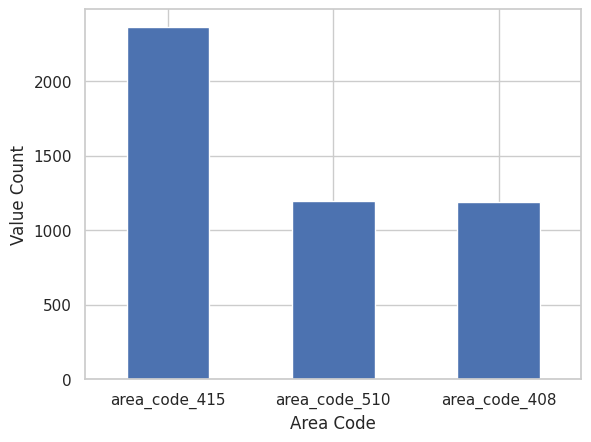

In [221]:
a.plot(kind = 'bar')
plt.xlabel('Area Code')
plt.ylabel('Value Count')
plt.xticks(rotation=0);

<Axes: >

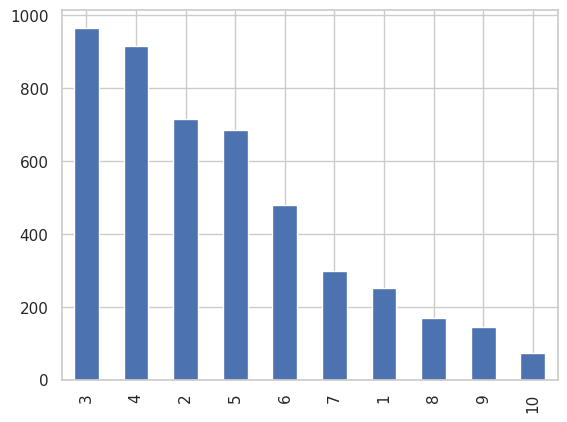

In [222]:
df['intl.calls'].value_counts().head(10).plot(kind = 'bar')

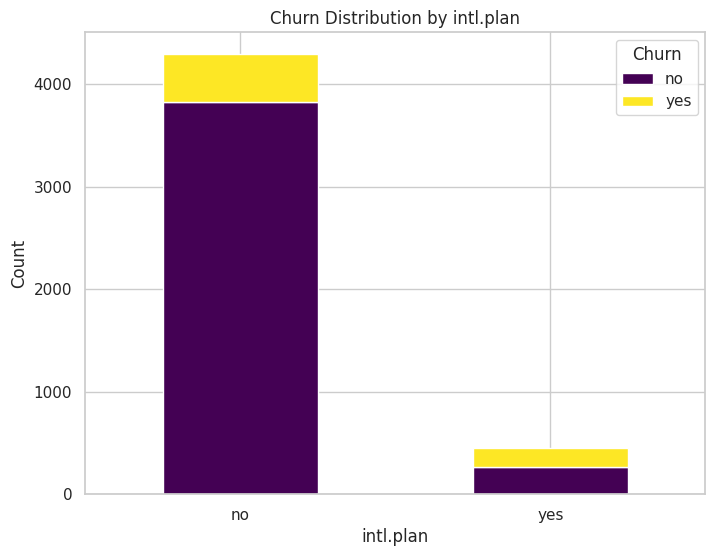

In [223]:
# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(df['intl.plan'], df['churn'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))

# Customize the plot
plt.title('Churn Distribution by intl.plan')
plt.xlabel('intl.plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)

# Show the plot
plt.show()

<Axes: ylabel='intl.plan'>

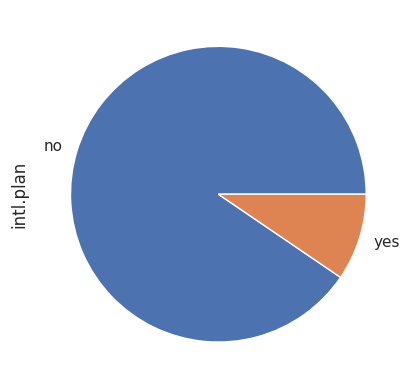

In [224]:
df['intl.plan'].value_counts().plot(kind ='pie')

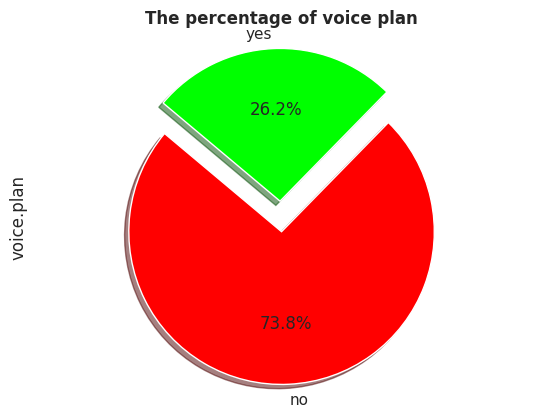

In [225]:
value_counts = df['voice.plan'].value_counts()
custom_colors = ['#FF0000', '#00FF00']
explode = (0.1, 0.1)
value_counts.plot(kind='pie', explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, colors=custom_colors)
plt.title('The percentage of voice plan', weight='bold')
plt.axis('equal')
plt.show()

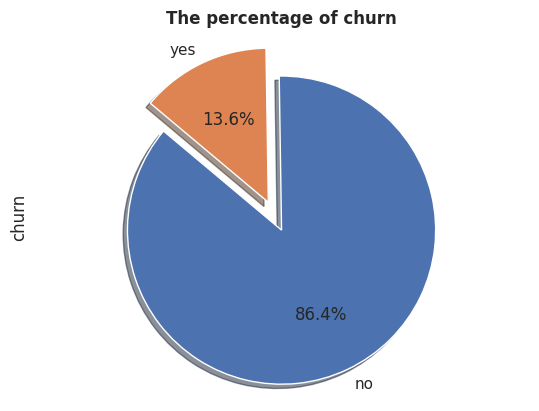

In [226]:
value_counts = df['churn'].value_counts()
explode = (0.1, 0.1)
value_counts.plot(kind='pie', explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentage of churn', weight='bold')
plt.axis('equal')
plt.show()

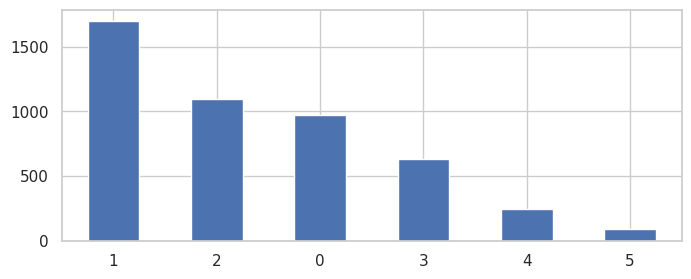

In [227]:
plt.figure(figsize = (8,3))
df['customer.calls'].value_counts().plot(kind ='bar')
plt.xticks(rotation = 0);

In [228]:
day_charge = df['day.charge'].mean()
eve_charge = df['eve.charge'].mean()
night_charge = df['night.charge'].mean()

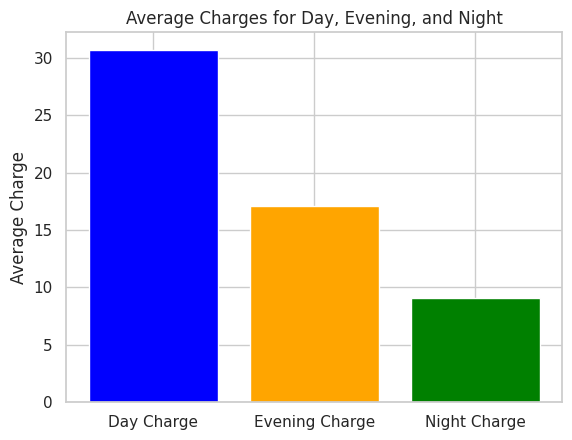

In [229]:
charges = [day_charge, eve_charge, night_charge]
charge_labels = ['Day Charge', 'Evening Charge', 'Night Charge']

# Plotting
plt.bar(charge_labels, charges, color=['blue', 'orange', 'green'])
plt.ylabel('Average Charge')
plt.title('Average Charges for Day, Evening, and Night')
plt.show()

In [230]:
day_mins=df['day.mins'].mean()
eve_mins=df['eve.mins'].mean()
night_mins=df['night.mins'].mean()
international_mins=df['intl.mins'].mean()

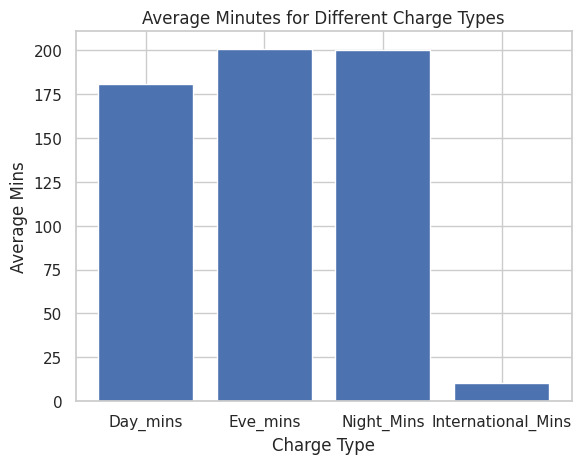

In [231]:
charges = [day_mins, eve_mins, night_mins, international_mins]
charge_labels = ['Day_mins', 'Eve_mins', 'Night_Mins', 'International_Mins']
df1 = pd.DataFrame({'Charge Type': charge_labels, 'Average Mins': charges})

plt.bar(df1['Charge Type'], df1['Average Mins'])
plt.xlabel('Charge Type')
plt.ylabel('Average Mins')
plt.title('Average Minutes for Different Charge Types')
plt.show()

In [232]:
intl_calls=df['intl.calls'].mean()
day_calls=df['day.calls'].mean()
eve_calls=df['eve.calls'].mean()
night_calls=df['night.calls'].mean()

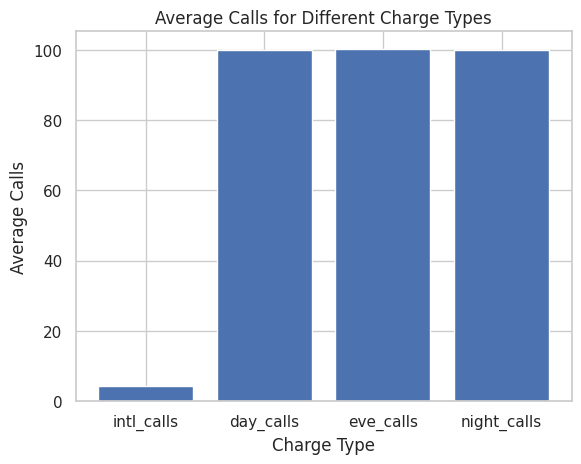

In [233]:
charges = [intl_calls, day_calls, eve_calls, night_calls]
charge_labels = ['intl_calls', 'day_calls', 'eve_calls', 'night_calls']
df2 = pd.DataFrame({'Charge Type': charge_labels, 'Average Calls': charges})

plt.bar(df2['Charge Type'], df2['Average Calls'])
plt.xlabel('Charge Type')
plt.ylabel('Average Calls')
plt.title('Average Calls for Different Charge Types')
plt.show()

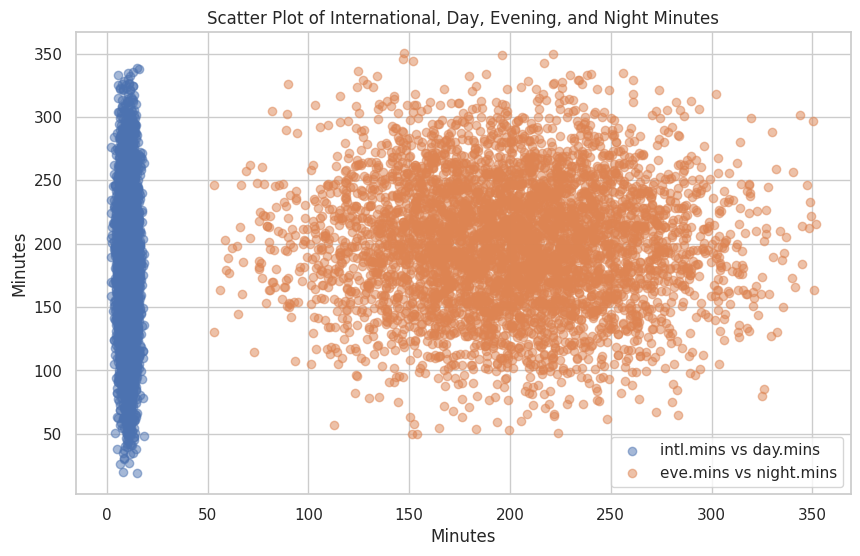

In [234]:
plt.figure(figsize=(10, 6))
plt.scatter(df['intl.mins'], df['day.mins'], label='intl.mins vs day.mins', alpha=0.5)
plt.scatter(df['eve.mins'], df['night.mins'], label='eve.mins vs night.mins', alpha=0.5)
plt.title('Scatter Plot of International, Day, Evening, and Night Minutes')
plt.xlabel('Minutes')
plt.ylabel('Minutes')
plt.legend()
plt.show()

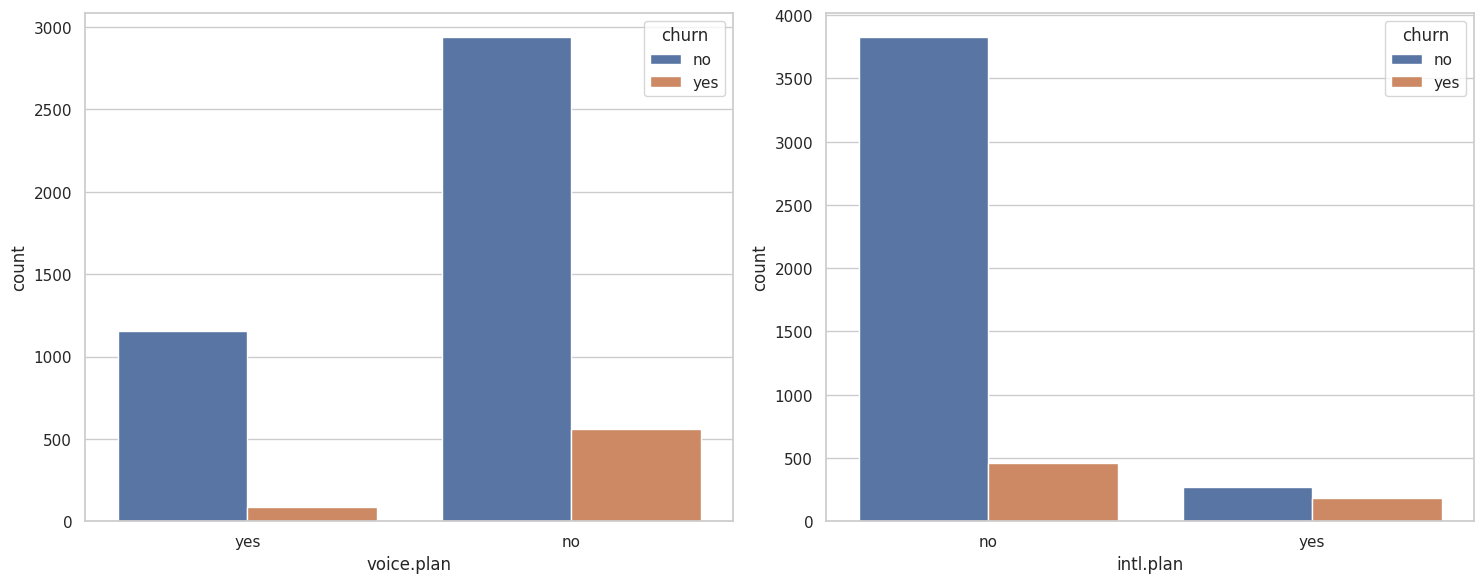

In [235]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.countplot(x='voice.plan', hue='churn', data=df, ax=axes[0])
sns.countplot(x='intl.plan', hue='churn', data=df, ax=axes[1])
plt.tight_layout()
plt.show()

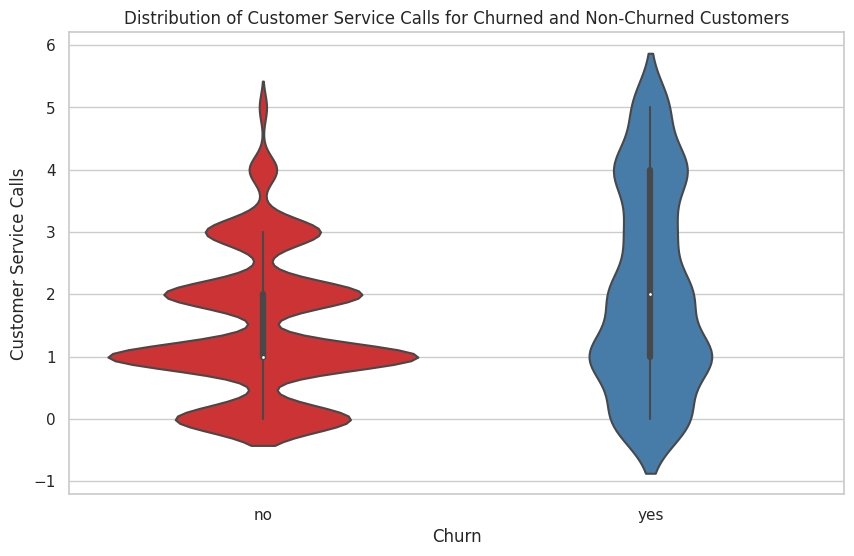

In [236]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="churn", y="customer.calls", data=df, palette="Set1")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.title("Distribution of Customer Service Calls for Churned and Non-Churned Customers")
plt.show()

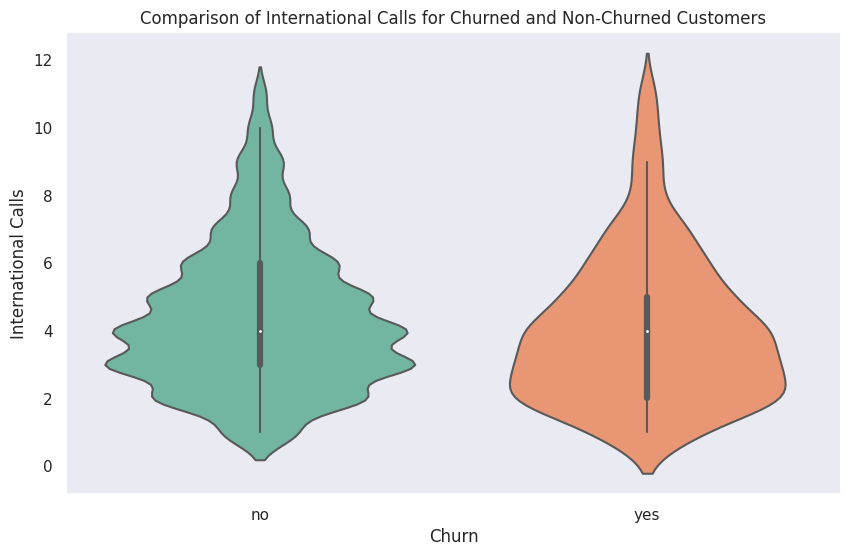

In [237]:
sns.set(style="dark")
plt.figure(figsize=(10, 6))
sns.violinplot(x="churn", y="intl.calls", data=df, palette="Set2")
plt.xlabel("Churn")
plt.ylabel("International Calls")
plt.title("Comparison of International Calls for Churned and Non-Churned Customers")
plt.show()

<Figure size 800x600 with 0 Axes>

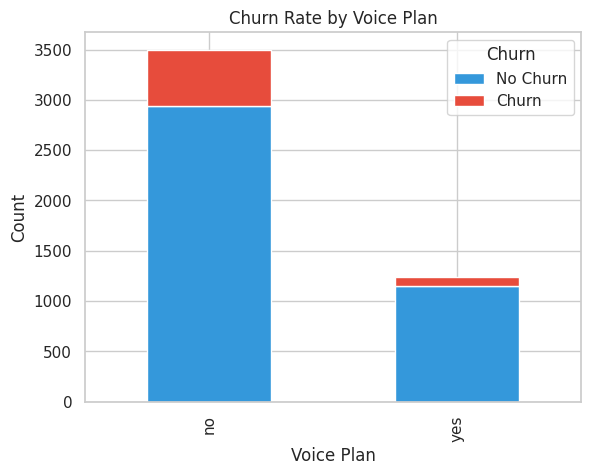

In [238]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
grouped_data = df.groupby(['voice.plan', 'churn']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=["#3498db", "#e74c3c"])
plt.xlabel("Voice Plan")
plt.ylabel("Count")
plt.title("Churn Rate by Voice Plan")
plt.legend(title="Churn", loc="upper right", labels=["No Churn", "Churn"])
plt.show()

# Feature Engineering

In [239]:
import warnings
warnings.filterwarnings('ignore')

In [240]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [241]:
columns=['state','area.code','voice.plan','intl.plan','churn']
for i in columns:
  df[i]=le.fit_transform(df[i])

In [242]:
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,27,0,75,0,0,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0
4995,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0


## Recursive Feature Elimination (RFE)

In [243]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
X =df.drop(['churn'],axis=1)
y =df['churn']
model =RandomForestClassifier()
model.fit(X, y)
feature_importances=pd.DataFrame({'Columns':X.columns,'Importance':model.feature_importances_})
sorted_features=feature_importances.sort_values(by='Importance',ascending=False)
print(sorted_features)

           Columns  Importance
9         day.mins    0.147550
11      day.charge    0.136785
18  customer.calls    0.099545
5        intl.plan    0.079994
12        eve.mins    0.065493
14      eve.charge    0.064636
7       intl.calls    0.057420
6        intl.mins    0.041238
8      intl.charge    0.040392
17    night.charge    0.037697
15      night.mins    0.037281
4   voice.messages    0.031262
2   account.length    0.028063
16     night.calls    0.027464
10       day.calls    0.027133
3       voice.plan    0.025171
13       eve.calls    0.023383
0            state    0.022443
1        area.code    0.007051


## SelectkBest

In [244]:
from sklearn.feature_selection import SelectKBest, chi2

In [245]:
X = df.drop(['churn'], axis=1)
y = df['churn']

In [246]:
k_best = SelectKBest(chi2, k='all')
X_k_best = k_best.fit_transform(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best.scores_})
sorted_score = feature_scores.sort_values(by='Score', ascending=False)
print(sorted_score)

           Feature        Score
9         day.mins  3543.517735
4   voice.messages  1155.623142
11      day.charge   601.289388
12        eve.mins   527.087363
5        intl.plan   282.127948
18  customer.calls   143.063079
15      night.mins   122.584193
3       voice.plan    45.491249
14      eve.charge    45.121437
2   account.length    35.979058
7       intl.calls    15.210759
6        intl.mins    12.275427
10       day.calls     7.333851
17    night.charge     5.516320
8      intl.charge     3.312819
0            state     3.272185
16     night.calls     1.286967
13       eve.calls     1.043573
1        area.code     0.229020


In [247]:
X.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls'],
      dtype='object')

### Top 13 Features

In [248]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [249]:
top_n_features_RFC = feature_importances.nlargest(13, 'Importance')['Columns']
selected_features_RFC = X[top_n_features_RFC]
selected_features_RFC

,day.mins,day.charge,customer.calls,intl.plan,eve.mins,eve.charge,intl.calls,intl.mins,intl.charge,night.charge,night.mins,voice.messages,account.length
0,265.1,45.07,1,0,197.4,16.78,3,10.0,2.70,11.01,244.7,25,128
1,161.6,27.47,1,0,195.5,16.62,3,13.7,3.70,11.45,254.4,26,107
2,243.4,41.38,0,0,121.2,10.30,5,12.2,3.29,7.32,162.6,0,137
3,299.4,50.90,2,1,61.9,5.26,7,6.6,1.78,8.86,196.9,0,84
4,166.7,28.34,3,1,148.3,12.61,3,10.1,2.73,8.41,186.9,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,170.7,29.02,1,0,193.1,16.41,7,6.9,1.86,5.81,129.1,0,75
4995,235.7,40.07,2,0,223.0,18.96,5,9.9,2.67,13.39,297.5,40,50
4996,184.2,31.31,3,0,256.8,21.83,2,14.7,3.97,9.61,213.6,0,152
4997,140.6,23.90,1,0,172.8,14.69,4,13.6,3.67,9.56,212.4,0,61


In [250]:
pip install imbalanced-learn

In [251]:
from imblearn.over_sampling import RandomOverSampler

In [252]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [253]:
model=RandomOverSampler()
x,Y=model.fit_resample(X,y)
data1=pd.concat([pd.DataFrame(x,columns=X.columns),pd.Series(Y,name='churn')],axis=1)

# Model Building

In [254]:
!pip install catboost

In [255]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

In [256]:
X=data1.loc[:,['voice.plan','voice.messages','intl.plan','intl.mins','intl.calls','intl.charge','day.mins','day.charge','eve.mins','eve.charge','night.mins',
 'night.charge','customer.calls']]
y=data1.iloc[:,-1]

In [257]:
data1['churn'].value_counts()

0    4094
1    4094
Name: churn, dtype: int64

In [258]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)

In [259]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),GaussianNB(),MultinomialNB(),BernoulliNB(),AdaBoostClassifier(),CatBoostClassifier()]
results=pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])
for model in models:
  model_name=model.__class__.__name__
  model.fit(x_train,y_train)
  train_predictions=model.predict(x_train)
  test_predictions=model.predict(x_test)
  train_accuracy=accuracy_score(y_train,train_predictions)
  test_accuracy=accuracy_score(y_test,test_predictions)

  results = results.append({'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }, ignore_index=True)
  print(f'Classification Report {model_name}')
  print(classification_report(y_test,test_predictions))
  print('===========================================================================================')

Classification Report DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       827
           1       0.96      1.00      0.98       811

    accuracy                           0.98      1638
   macro avg       0.98      0.98      0.98      1638
weighted avg       0.98      0.98      0.98      1638

Classification Report RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       827
           1       0.98      1.00      0.99       811

    accuracy                           0.99      1638
   macro avg       0.99      0.99      0.99      1638
weighted avg       0.99      0.99      0.99      1638

Classification Report KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       827
           1       0.78      0.95      0.86       811

    accuracy                           0.84      

In [260]:
results['Rank']=results['Test Accuracy'].rank(ascending=False)
print(results)

                         Model  Train Accuracy  Test Accuracy  Rank
0       DecisionTreeClassifier        1.000000       0.977411   4.5
1       RandomForestClassifier        1.000000       0.989621   1.0
2         KNeighborsClassifier        0.903053       0.843101   8.0
3   GradientBoostingClassifier        0.911603       0.910256   6.0
4                XGBClassifier        0.999847       0.989011   2.0
5               LGBMClassifier        0.995267       0.979243   3.0
6                   GaussianNB        0.795267       0.791209   9.0
7                MultinomialNB        0.609771       0.603785  10.0
8                  BernoulliNB        0.609771       0.585470  11.0
9           AdaBoostClassifier        0.841679       0.850427   7.0
10          CatBoostClassifier        0.988855       0.977411   4.5


In [261]:
import plotly.express as px
fig=px.bar(results,x='Model',y='Test Accuracy',labels={'Test Accuracy':'Test Accuracy'},color='Rank')
fig.show()

### Finalizing RandomForest Classification for deployment

In [262]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train,y_train)
y_pred_test=model_RF.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred_test)
print('Test Accuracy:',test_accuracy)

Test Accuracy: 0.989010989010989


In [263]:
print('Classification Report:',classification_report(y_test,y_pred_test))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99       827
           1       0.98      1.00      0.99       811

    accuracy                           0.99      1638
   macro avg       0.99      0.99      0.99      1638
weighted avg       0.99      0.99      0.99      1638



In [264]:
import pickle
with open("Telecom_Churn_Model.pkl", "wb") as file:
    pickle.dump(model_RF, file)

In [265]:
from joblib import dump

dump(model_RF, "Tele_Com.joblib")

['Tele_Com.joblib']

In [267]:
import sklearn
print(sklearn.__version__)

1.2.2
